In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Student dataset
df = pd.read_excel("students_marks.xlsx")

# Print first 5 rows of the dataframe
print(df.head())

   Roll No    Name  DBMS  Python  Data Science  OS_Linux  Statistics  \
0        1   Kiran    77      82            87        76          65   
1        2   Suman    76      87            92        54          72   
2        3  Vikram    87      90            88        60          93   
3        4     Raj    76      76            68        93          98   
4        5  Simran    95      61            87        62          75   

   Total Obtained  Total Marks  
0             387          500  
1             381          500  
2             418          500  
3             411          500  
4             380          500  


In [61]:
subjects = ["DBMS", "Python", "Data Science", "OS_Linux", "Statistics"]

# Total marks
df["Total_Marks"] = df[subjects].sum(axis=1)  

# Average marks
df["Average_Marks"] = df[subjects].mean(axis=1)

print(df[["Name", "Total_Marks", "Average_Marks"]].head())

     Name  Total_Marks  Average_Marks
0   Kiran          387           77.4
1   Suman          381           76.2
2  Vikram          418           83.6
3     Raj          411           82.2
4  Simran          380           76.0


In [62]:
# Topper 
topper = df.loc[df["Total_Marks"].idxmax()]
print("Topper details...")
print(topper) 


Topper details...
Roll No                   455
Name              Ananya Nair
DBMS                       90
Python                     98
Data Science               96
OS_Linux                   98
Statistics                 99
Total Obtained            481
Total Marks               500
Total_Marks               481
Average_Marks            96.2
Name: 454, dtype: object


In [63]:
# Function to find grade
def assign_grade(avg):
    if avg >= 90:
        return "A"
    elif avg >= 75:
        return "B"
    elif avg >= 60:
        return "C"
    elif avg >= 50:
        return "D"
    elif avg >= 45:
        return "E"
    else:
        return "F"

# Grading
df["Grade"] = df["Average_Marks"].apply(assign_grade)

print(df[["Name", "Average_Marks", "Grade"]].head())



     Name  Average_Marks Grade
0   Kiran           77.4     B
1   Suman           76.2     B
2  Vikram           83.6     B
3     Raj           82.2     B
4  Simran           76.0     B


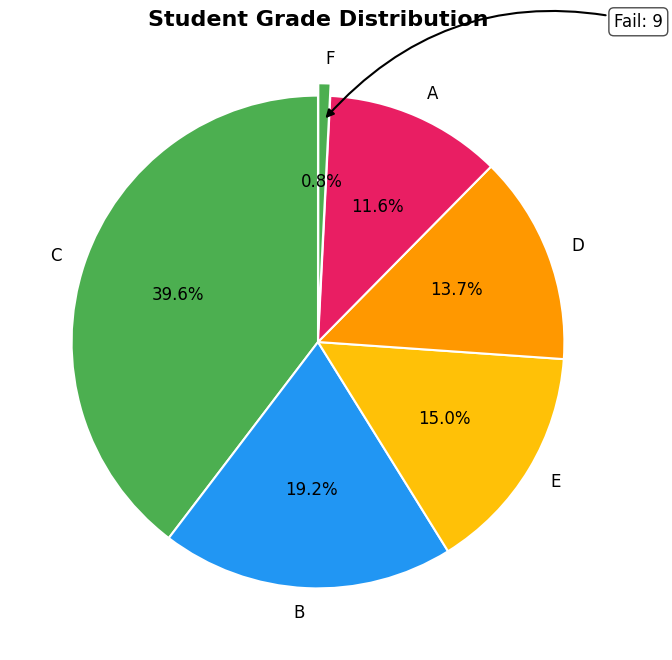

In [64]:
grade_counts = df["Grade"].value_counts()

# Pie Chart
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF9800', '#E91E63']
explode = [0.05 if val == grade_counts.min() else 0 for val in grade_counts] 

plt.figure(figsize=(8,8))

wedges, texts, autotexts = plt.pie(
    grade_counts,
    labels=grade_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1.5} 
)

# Style labels and percentages
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

plt.title("Student Grade Distribution", fontsize=16, fontweight='bold')

# Annotate the 'F' wedge
f_index = list(grade_counts.index).index('F')
f_wedge = wedges[f_index]
angle = (f_wedge.theta2 + f_wedge.theta1) / 2
x = np.cos(np.deg2rad(angle))
y = np.sin(np.deg2rad(angle))

plt.annotate(
    f"Fail: {grade_counts['F']}",
    xy=(0.9*x, 0.9*y),
    xytext=(1.3*np.sign(x), 1.3*y),
    ha='center',
    va='center',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
    arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3,rad=0.3", color='black', lw=1.5)
)

plt.show()


Accuracy: 0.995575221238938
Precision: 1.0
Recall: 0.995575221238938
F1-score: 0.9977827050997783


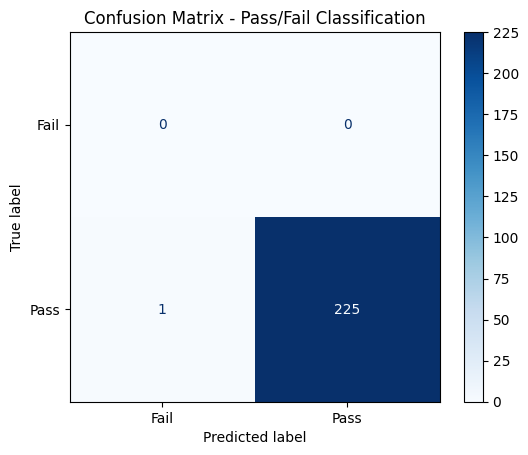

/home/atwal/.local/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


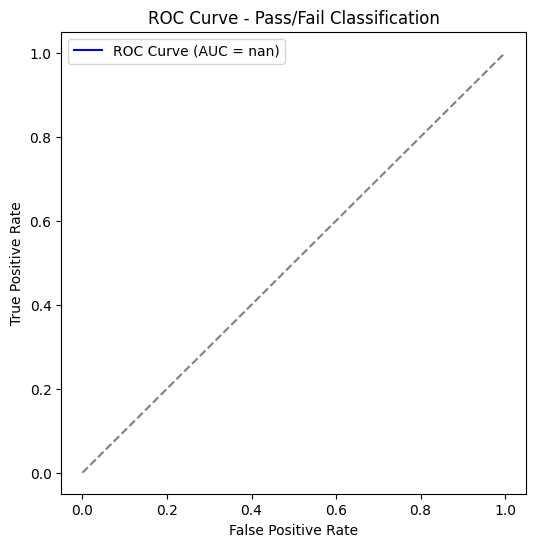

In [65]:
# Binary Classification (Pass/Fail)

df["Pass"] = df["Average_Marks"].apply(lambda x: 1 if x >= 40 else 0)

# Features and target
X = df[["DBMS", "Python", "Data Science", "OS_Linux", "Statistics"]]
y = df["Pass"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion Matrix 
labels = [0, 1]   # 0 = Fail, 1 = Pass
display_labels = ["Fail", "Pass"]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Pass/Fail Classification")
plt.show()

# ROC Curve
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of "Pass"
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Pass/Fail Classification")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           A       0.95      0.83      0.89        24
           B       0.90      0.86      0.88        50
           C       0.94      0.97      0.95        92
           D       0.90      0.84      0.87        31
           E       0.85      0.97      0.90        29

    accuracy                           0.91       226
   macro avg       0.91      0.89      0.90       226
weighted avg       0.91      0.91      0.91       226



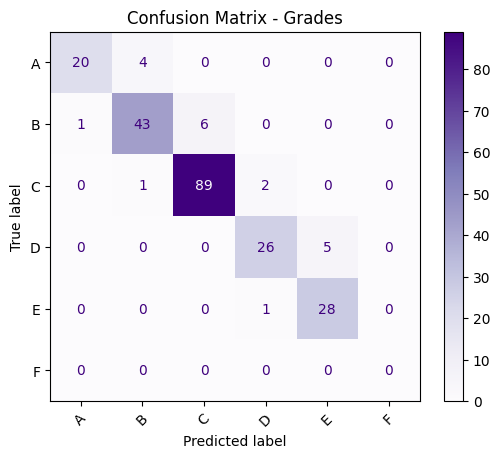

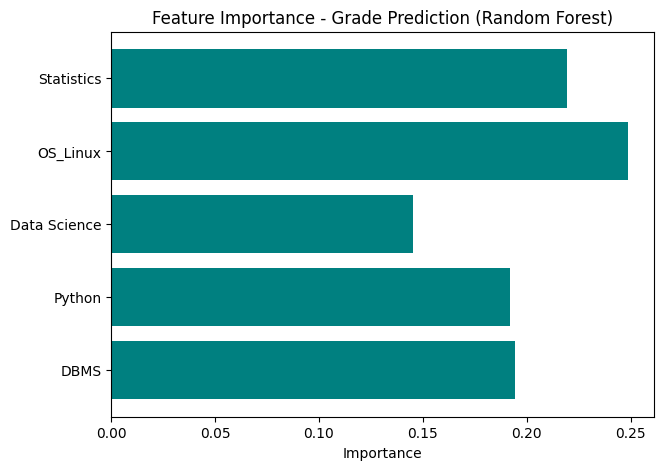

In [66]:
# Multiclass Classification (Grades A–F)

# Features and target
X = df[["DBMS", "Python", "Data Science", "OS_Linux", "Statistics"]]
y = df["Grade"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Purples", xticks_rotation=45)
plt.title("Confusion Matrix - Grades")
plt.show()

# Feature Importance
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.barh(features, importances, color="teal")
plt.xlabel("Importance")
plt.title("Feature Importance - Grade Prediction (Random Forest)")
plt.show()


MAE: 4.370152224365218e-15
RMSE: 7.398080052853664e-15
R²: 1.0


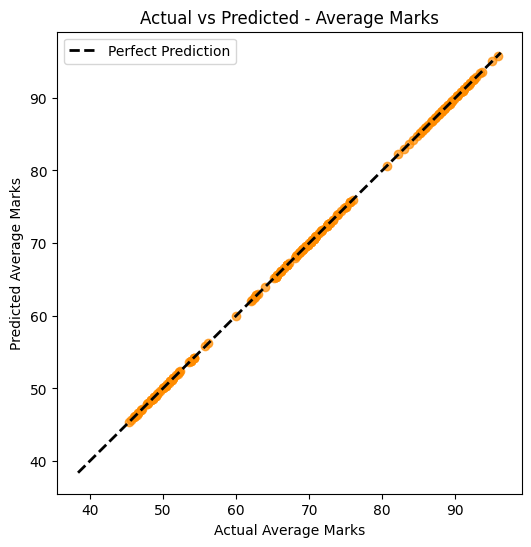

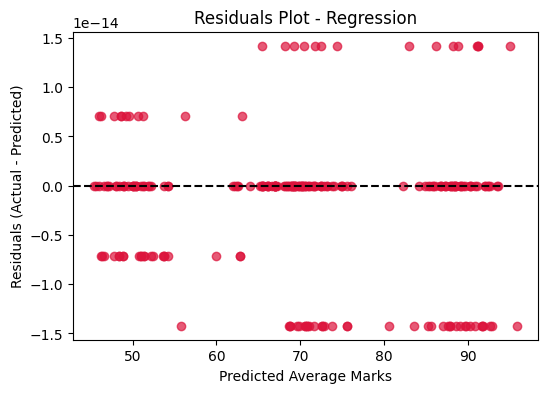

In [67]:
# Regression (Predicting Average Marks)

# Features and target
X = df[["DBMS", "Python", "Data Science", "OS_Linux", "Statistics"]]
y = df["Average_Marks"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="darkorange", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2, label="Perfect Prediction")
plt.xlabel("Actual Average Marks")
plt.ylabel("Predicted Average Marks")
plt.title("Actual vs Predicted - Average Marks")
plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color="crimson", alpha=0.7)
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Predicted Average Marks")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot - Regression")
plt.show()
